In [6]:
import pandas as pd
from pathlib import Path

# Chemin vers le CSV sauvegardé (../ car on part de code/)
csv_path = Path("..") / "data" / "prices_raw.csv"

In [9]:
prices = pd.read_csv(csv_path, index_col=0, parse_dates=True)

# Ici index_col permet que la colonne date devienne l'index  et parse_dates permet de transformer la date d'un texte en objet date 

print ("Dimensions :", prices.shape)
prices.head()

Dimensions : (2643, 3)


,VFV,XIU,ZAG
Date,,,
2015-01-02,37.097408,16.031300,11.432718
2015-01-05,36.346500,15.609818,11.475917
2015-01-06,36.251537,15.476708,11.504714
2015-01-07,36.665848,15.521077,11.519116
2015-01-08,37.373615,15.742924,11.461517


In [11]:
# Le code qui suit permet de calculer les rendements mensuels 
# resample ("ME") prend le dernier prix du mois 
# pc_changes calcul la variation du prix MoM
# dropna empêche de calculer la variation lors du premier mois car il n'y a pas décembre 2014

returns = (prices.resample("ME").last().pct_change().dropna())
returns.head()

,VFV,XIU,ZAG
Date,,,
2015-02-28,0.041121,0.038285,-0.001744
2015-03-31,-0.003815,-0.020445,-0.003590
2015-04-30,-0.038967,0.020548,-0.012792
2015-05-31,0.045027,-0.010738,0.000710
2015-06-30,-0.015795,-0.029211,-0.004891


In [12]:
#Sauvegarde du csv 

out = Path("..") / "data" / "returns_monthly.csv"
returns.to_csv(out)
print("✓ Rendements mensuels enregistrés ->", out)

✓ Rendements mensuels enregistrés -> ../data/returns_monthly.csv


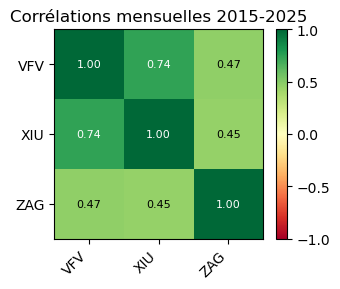

In [17]:
#Représentation visuelle de la corrélation (heatmap)

import matplotlib.pyplot as plt
import numpy as np

corr = returns.corr() #calcul de la matrice de corrélation de Pearson

#création de la figure 

fig, ax = plt.subplots(figsize=(4, 3))
im = ax.imshow(corr, vmin=-1, vmax=1, cmap="RdYlGn") #définit que l'on montre la corrélation, définie entre -1 et 1 sur la figure

# Insertion des tickers et des titres sur la figure

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns))) # sur les deux lignes là on crée les positions (0,1,2) des graduations (ticks) sur X et Y.

ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right") #paramètre de visualisation inclinaison des tickers

# -----------  valeurs dans les cases  -----------
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        txt_color = "white" if abs(value) > 0.5 else "black"  # contraste lisible
        ax.text(j, i, f"{value:.2f}",
                ha="center", va="center",
                color=txt_color, fontsize=8)

# barre de couleurs + titre
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Corrélations mensuelles 2015-2025")
plt.tight_layout()
plt.show()